In [1]:
import numpy as np
import pydicom
import os

from detect_points import detect_spheres_from_dicom

[Taichi] version 1.7.3, llvm 15.0.1, commit 5ec301be, win, python 3.8.10
[Taichi] Starting on arch=x64


In [2]:
dicom_path = "C:/Users/YangLiangZhu/Desktop/泰州CT模型/0605脊柱实验数据/dicom_data_bad_01"
path1 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0605/1/CT-MP25075-250605-yan/S3010"
path2 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0605/2/CT-MP25075-250605-yan/S4010"
path3 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0605/3/CT-MP25075-250605-yan/S5010"
path4 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0605/4/CT-MP25075-250605-yan/S6010"
path5 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0605/5/CT-MP25075-250605-yan/S7010"
path6 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0605/6/CT-MP25075-250605-yan/S8010"
path7 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0605/7/CT-MP25075-250605-yan/S9010"
path8 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0605/8/CT-MP25075-250605-yan/S10010"

path1_1 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0606/1/dicom_data1_yan"
path3_1 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0606/3/CT-MP25080-250606-yan/S5010"
path4_1 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0606/4/CT-MP25080-250606-yan/S6010"
path5_1 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0606/5/CT-MP25080-250606-yan/S7010"  # z轴偏了
path7_1 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0606/7/dicom_data_gui"  # z轴偏了

path_9_1 = "C:/Users/YangLiangZhu/Desktop/泰州精度验证/Tai0606/9/dicom_data9_yan"

dicom_files = []
for root, dirs, files in os.walk(path_9_1):
    for file in files:
        if file.endswith('.dcm'):
            dicom_files.append(os.path.join(root, file))
dicom_files.sort()
slices = list()
for f in dicom_files:
    try:
        ds = pydicom.dcmread(f, force=True)
        if hasattr(ds, 'pixel_array'):  # 确保文件包含像素数据
            slices.append(ds)
        else:
            print(f"⚠️ 无像素数据: {f}")
            # print(ds.pixel_array.shape)
    except Exception as e:
        print(f"❌ 读取失败: {f}, 错误: {e}")
slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))
data = np.stack([s.pixel_array for s in slices])
data = np.flip(data, axis=0)
x, y, z = data.shape

pixel_spacing = slices[0].PixelSpacing  # x,y轴间隔
if hasattr(slices[0], 'SpacingBetweenSlices'):  # Z轴间隔
    thickness = slices[0].SpacingBetweenSlices
else:
    thickness = abs(slices[1].ImagePositionPatient[2] - slices[0].ImagePositionPatient[2])

pos_ori = slices[-1].ImagePositionPatient  # 原点

spheres, p_bounds = detect_spheres_from_dicom(data=data, pixel_spacing=pixel_spacing, thickness=thickness, pos_ori=pos_ori, num_spheres=10)
spheres

xp
[ 17  20  54  81 209 217   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
yp
[206 217 228 242 248 254 262 268 274 281 287 294 300 308 313 321 327 333
 338 346 352 358 364 370 376   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
zp
[  4  14  24  27  37  47  57  60  70  78  80  81  91 101 112 122 133 135
 146 156 166 178 187 197 207 217 232 248   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


array([[  33.421875,   20.221497, -215.895   ,    6.      ,   89.      ],
       [  37.78125 ,    9.565247, -279.89502 ,    6.      ,   84.      ],
       [  11.625   ,   14.893372, -215.895   ,    6.      ,   65.      ],
       [  11.625   ,   14.893372, -218.895   ,    5.      ,   52.      ],
       [  33.421875,   20.221497, -218.895   ,    8.      ,   43.      ],
       [  37.78125 ,   14.893372, -252.895   ,    6.      ,   38.      ],
       [  43.59375 ,   68.17462 , -407.89502 ,    6.      ,   33.      ],
       [  37.78125 ,   73.50275 , -407.89502 ,    6.      ,   29.      ],
       [  43.59375 ,   68.17462 , -415.89502 ,    5.      ,   29.      ],
       [  37.78125 ,   71.08087 , -407.89502 ,    5.      ,   28.      ]],
      dtype=float32)

In [ ]:
import matplotlib.pyplot as plt


print(pixel_spacing[0], thickness)
r = round(5 / pixel_spacing[0])
for center in p_bounds.keys():
    x, y, z = int(center[0]), int(center[1]), int(center[2])
    x_lines = list()
    y_lines = list()
    z_lines = list()
    for i in range(x - r, x + r):
        x_lines.append(data[i, y, z])
    for i in range(y - r, y + r):
        y_lines.append(data[x, i, z])
    for i in range(z - r, z + r):
        z_lines.append(data[x, y, i])
    # 画图
    plt.figure(figsize=(15, 5))
    
    # 绘制x_lines
    plt.subplot(1, 3, 1)
    plt.plot(range(x - r, x + r), x_lines)
    plt.title(f'X line center={center}')
    plt.xlabel('X')
    plt.ylabel('Hu')
    
    # 绘制y_lines
    plt.subplot(1, 3, 2)
    plt.plot(range(y - r, y + r), y_lines)
    plt.title(f'Y Line center={center}')
    plt.xlabel('Y')
    plt.ylabel('Hu')
    
    # 绘制z_lines
    plt.subplot(1, 3, 3)
    plt.plot(range(z - r, z + r), z_lines)
    plt.title(f'Z Line center={center}')
    plt.xlabel('Z')
    plt.ylabel('Hu')
    
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(pixel_spacing[0], thickness)
r = round(7 / pixel_spacing[0])
for center in p_bounds.keys():
    x, y, z = int(center[0]), int(center[1]), int(center[2])
    x_line = np.array([data[i, y, z] for i in range(x - r, x + r)])
    y_line = np.array([data[x, i, z] for i in range(y - r, y + r)])
    z_line = np.array([data[x, y, i] for i in range(z - r, z + r)])
    
    x_min, x_max = max(0, x - r), min(data.shape[0], x + r)
    y_min, y_max = max(0, y - r), min(data.shape[1], y + r)
    z_min, z_max = max(0, z - r), min(data.shape[2], z + r)
            
    
    # X Max
    x_max1 = np.max(x_line)
    x_max1_idx = np.argmax(x_line)

    # 从最大值位置向后，找第一个小于最大值的点
    x_right_part = x_line[x_max1_idx + 1:]
    x_max2_rel_idx = np.argmax(x_right_part < x_max1) if np.any(x_right_part < x_max1) else None

    # 计算体素值
    x_max1_p = x - r + x_max1_idx
    if x_max2_rel_idx is not None:
        x_max2_p = x_max1_p + x_max2_rel_idx
    else:
        x_max2_p = x_max1_p  # fallback：没有找到比最大值小的点
    print(f"X最大值位置: {x_max1_p}，第一个下降位置: {x_max2_p}")
    
    # x轴的一半
    x_half_max = x_max1 / 2
    x_rise_edge = np.where(x_line[:x_max1_idx] <= x_half_max)[0]
    x_fall_edge = np.where(x_line[x_max1_idx:] <= x_half_max)[0]
    if len(x_rise_edge) > 0:
        x_rise_idx = x_rise_edge[-1]
        x_rise_p = x - r + x_rise_idx
    else:
        x_rise_p = None
    if len(x_fall_edge) > 0:
        x_fall_idx = x_max1_idx + x_fall_edge[0]
        x_fall_p = x - r + x_fall_idx
    else:
        x_fall_p = None
    
    # Y Max
    y_max1 = np.max(y_line)
    y_max1_idx = np.argmax(y_line)
    y_right_part = y_line[y_max1_idx + 1:]
    y_max2_rel_idx = np.argmax(y_right_part < y_max1) if np.any(y_right_part < y_max1) else None
    
    # 计算体素值
    y_max1_p = y - r + y_max1_idx
    if y_max2_rel_idx is not None:
        y_max2_p = y_max1_p + y_max2_rel_idx
    else:
        y_max2_p = y_max1_p  # fallback：没有找到比最大值小的点
    print(f"Y最大值位置: {y_max1_p}，第一个下降位置: {y_max2_p}")

    # Z Max
    z_max1 = np.max(z_line)
    z_max1_idx = np.argmax(z_line)
    z_right_part = z_line[z_max1_idx + 1:]
    z_max2_rel_idx = np.argmax(z_right_part < z_max1) if np.any(z_right_part < z_max1) else None
    
    # 计算体素值
    z_max1_p = z - r + z_max1_idx
    if z_max2_rel_idx is not None:
        z_max2_p = z_max1_p + z_max2_rel_idx
    else:
        z_max2_p = z_max1_p
    print(f"Z最大值位置: {z_max1_p}，第一个下降位置: {z_max2_p}")

    # 创建图形
    plt.figure(figsize=(15, 5))
    # 绘制x_lines
    plt.subplot(1, 3, 1)
    plt.plot(range(x - r, x + r), x_line)
    # Draw X Max
    plt.scatter(x_max1_p, x_line[x_max1_p - x_min], color='red', label='Max1')
    plt.text(x_max1_p, x_max1, f'{x_max1_p}', color='red', fontsize=9,
        ha='right', va='bottom')
    if x_max2_p != x_max1_p:
        plt.scatter(x_max2_p, x_line[x_max2_p - x_min], color='red', label='Max2')
        plt.text(x_max2_p, x_max1, f'{x_max2_p}', color='red', fontsize=9,
        ha='right', va='bottom')
    plt.axvline(x_max2_p, color='orange', linestyle='--')
    plt.axvline(x_max1_p, color='red', linestyle='--')
    plt.axvline(x_max2_p, color='red', linestyle='--')
    # 绘制 Half X
    if x_rise_p is not None:
        plt.scatter(x_rise_p, x_half_max, color='blue', label='½ Rise')
        # plt.axvline(x_rise_p, color='blue', linestyle='--')
        # plt.text(x_rise_p, rise_val, f'{rise_val:.1f}', color='blue', fontsize=8,
                # ha='right', va='bottom')

    # Half max fall
    if x_fall_p is not None:
        plt.scatter(x_fall_p, x_half_max, color='blue', label='½ Fall')
        # plt.axvline(x_fall_p, color='purple', linestyle='--')
        # plt.text(half_fall_p, fall_val, f'{fall_val:.1f}', color='purple', fontsize=8,
                    # ha='left', va='top')
    
    plt.title(f'X line center={center}')
    plt.xlabel('X')
    plt.ylabel('Hu')
    
    # 绘制y_lines
    plt.subplot(1, 3, 2)
    plt.plot(range(y - r, y + r), y_line)
    
    plt.scatter(y_max1_p, y_line[y_max1_p - y_min], color='red', label='Max1')
    plt.text(y_max1_p, y_max1, f'{y_max1_p}', color='red', fontsize=9,
        ha='right', va='bottom')
    if y_max2_p != y_max1_p:
        plt.scatter(y_max2_p, y_line[y_max2_p - y_min], color='red', label='Max2')
        plt.text(y_max2_p, y_max1, f'{y_max2_p}', color='red', fontsize=9,
        ha='right', va='bottom')
        
    plt.axvline(y_max1_p, color='red', linestyle='--')
    plt.axvline(y_max2_p, color='red', linestyle='--')
    plt.title(f'Y Line center={center}')
    plt.xlabel('Y')
    plt.ylabel('Hu')
    
    # 绘制z_lines
    plt.subplot(1, 3, 3)
    plt.plot(range(z - r, z + r), z_line)

    plt.scatter(z_max1_p, z_line[z_max1_p - z_min], color='red', label='Max1')
    plt.text(z_max1_p, z_max1, f'{z_max1_p}', color='red', fontsize=9,
        ha='right', va='bottom')
    if z_max2_p != z_max1_p:
        plt.scatter(z_max2_p, z_line[z_max2_p - z_min], color='red', label='Max2')
        plt.text(z_max2_p, z_max1, f'{z_max2_p}', color='red', fontsize=9,
        ha='right', va='bottom')

    plt.axvline(z_max1_p, color='red', linestyle='--')
    plt.axvline(z_max2_p, color='red', linestyle='--')
    plt.title(f'Z Line center={center}')
    plt.xlabel('Z')
    plt.ylabel('Hu')
    
    plt.tight_layout()
    plt.show()
    
    


0.484375 1


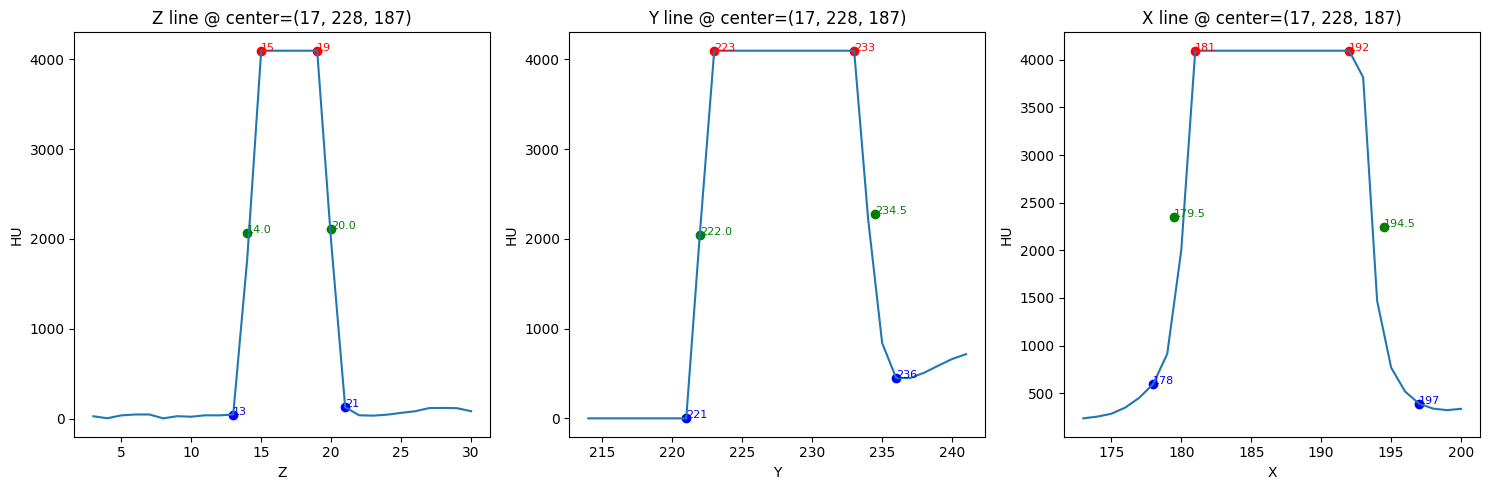

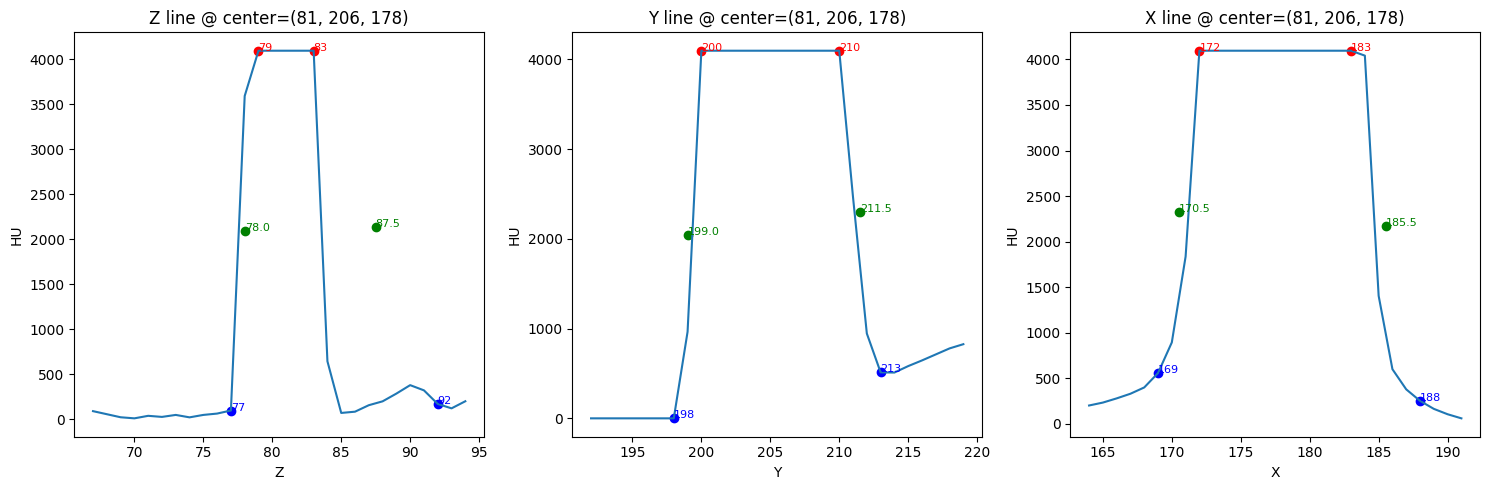

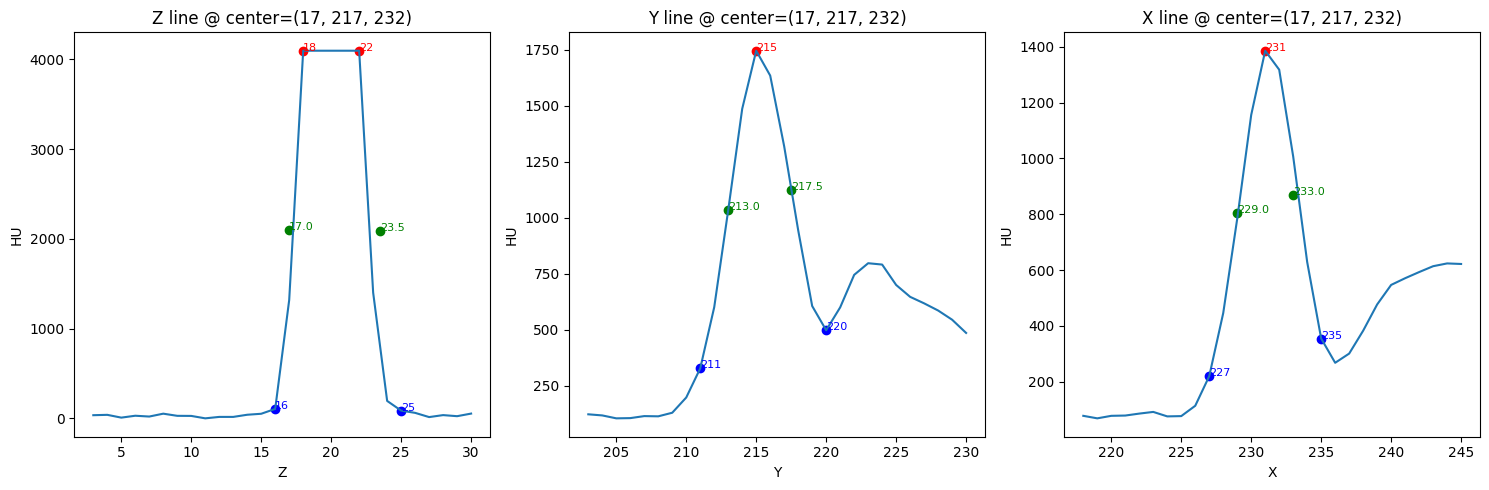

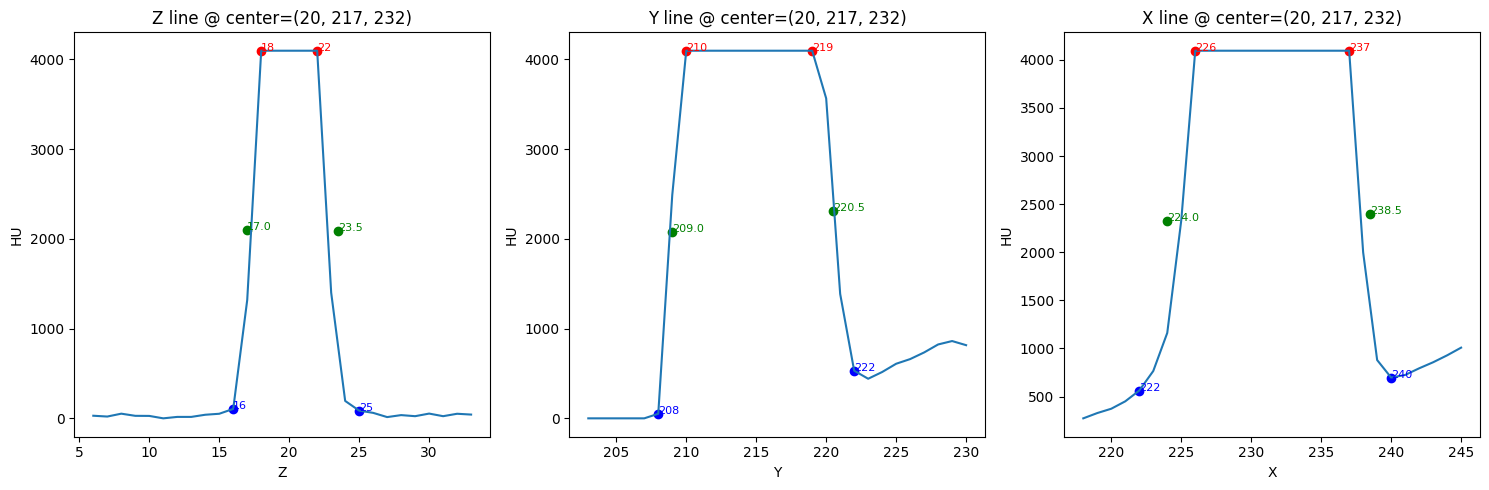

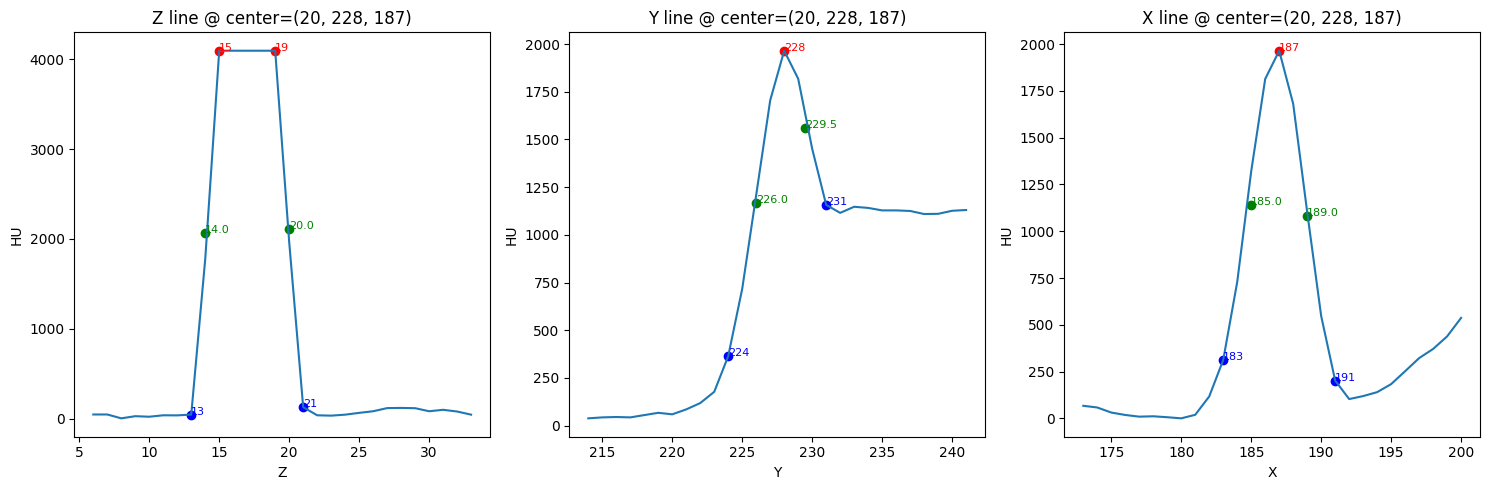

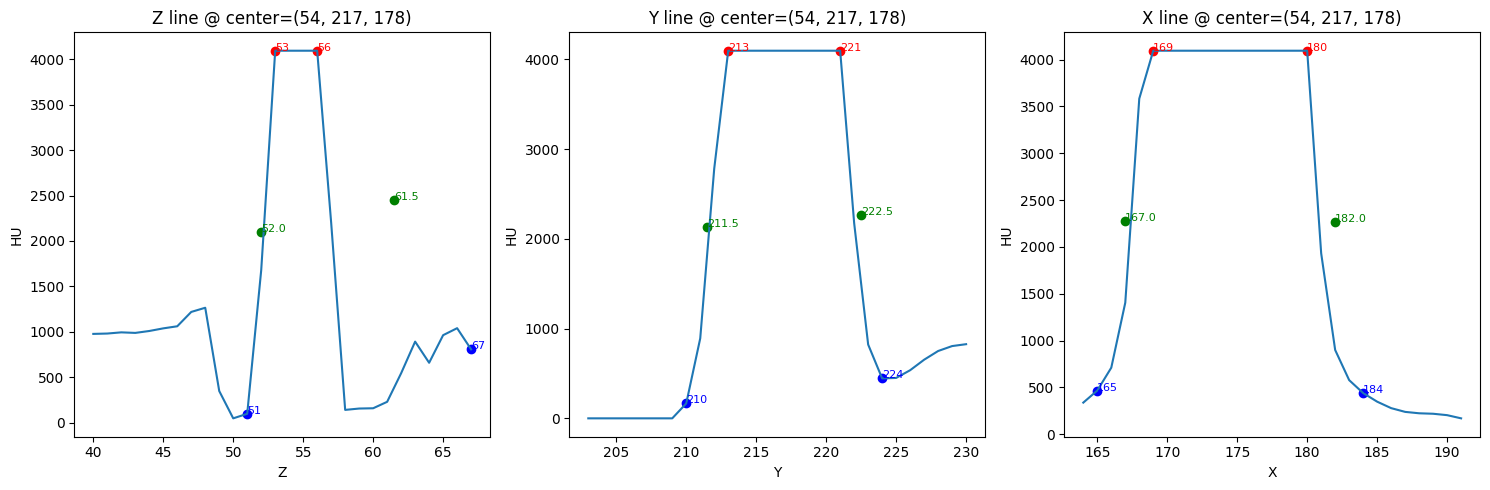

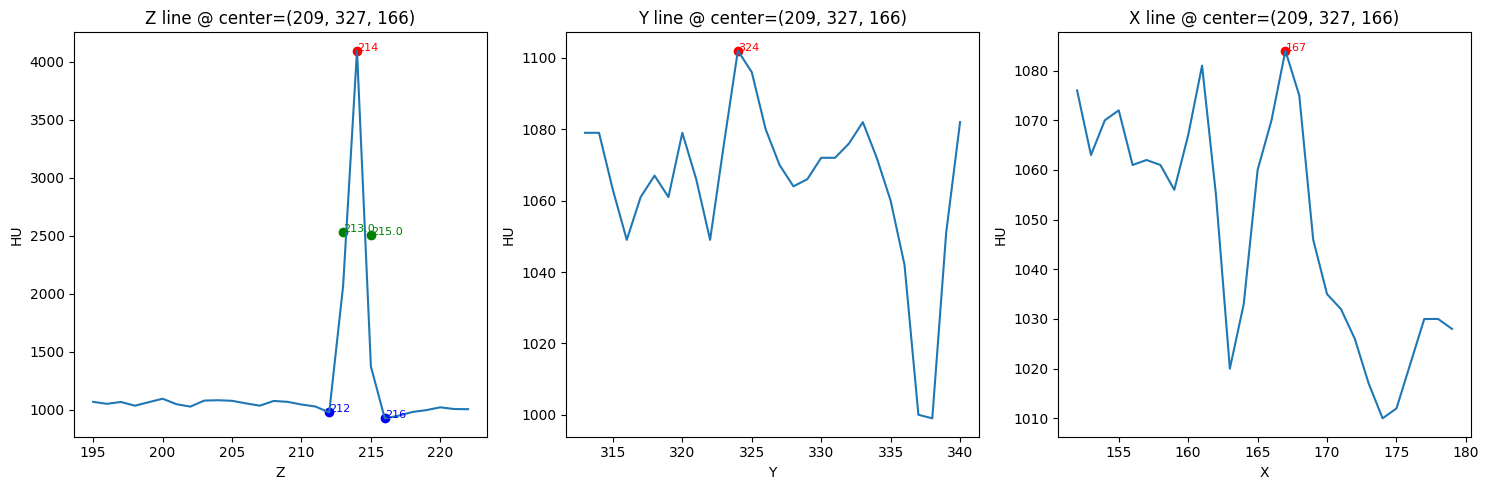

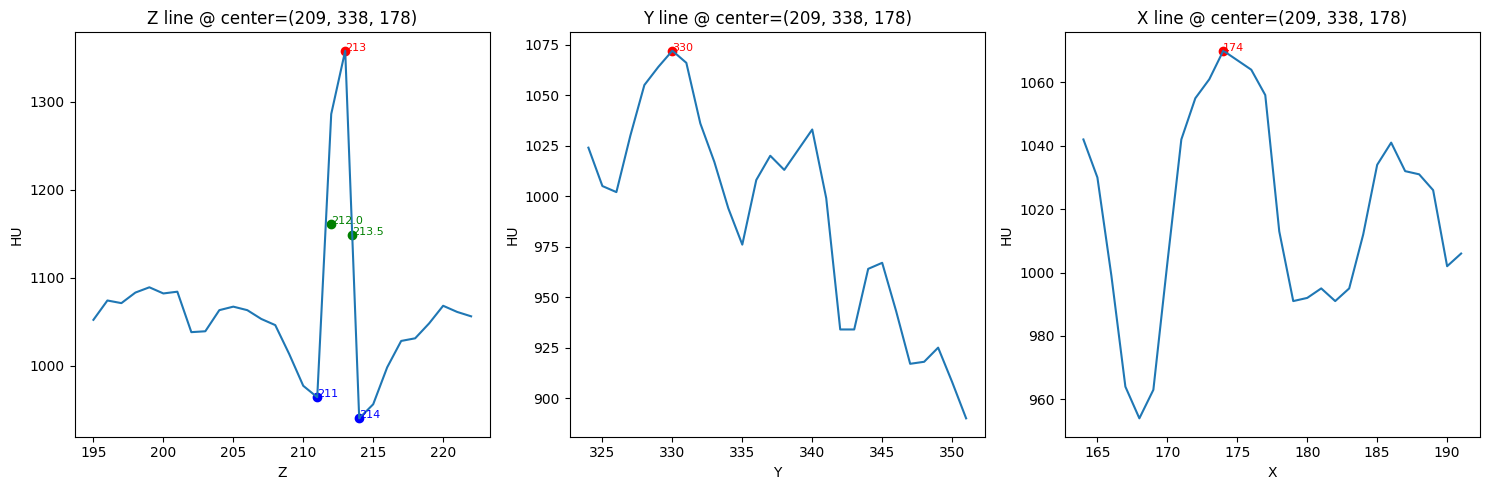

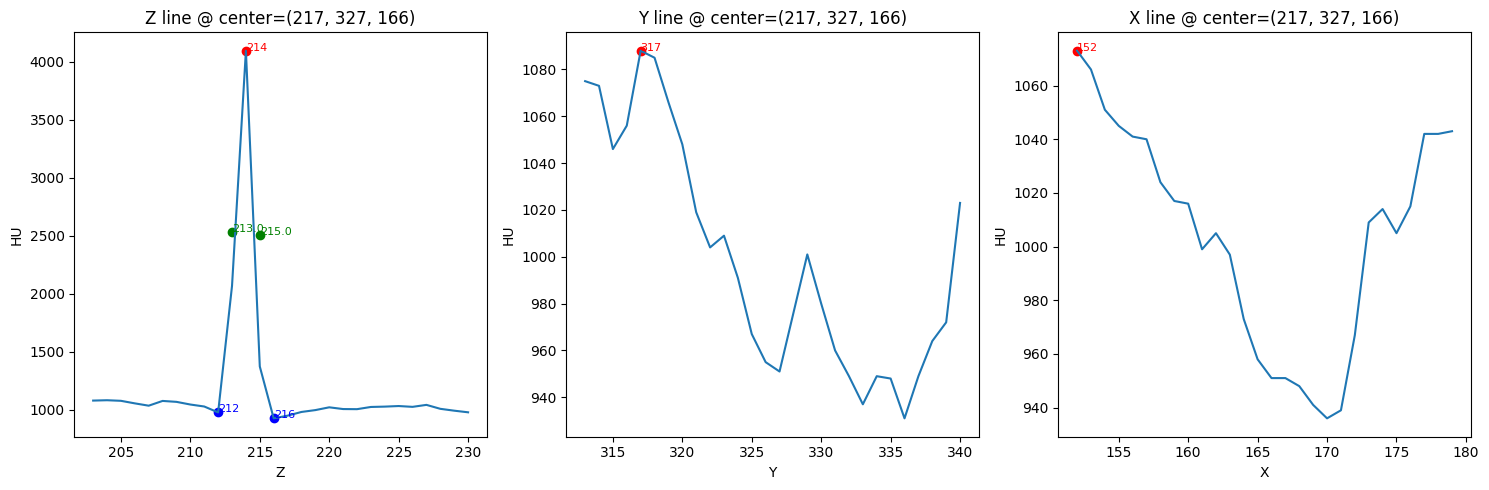

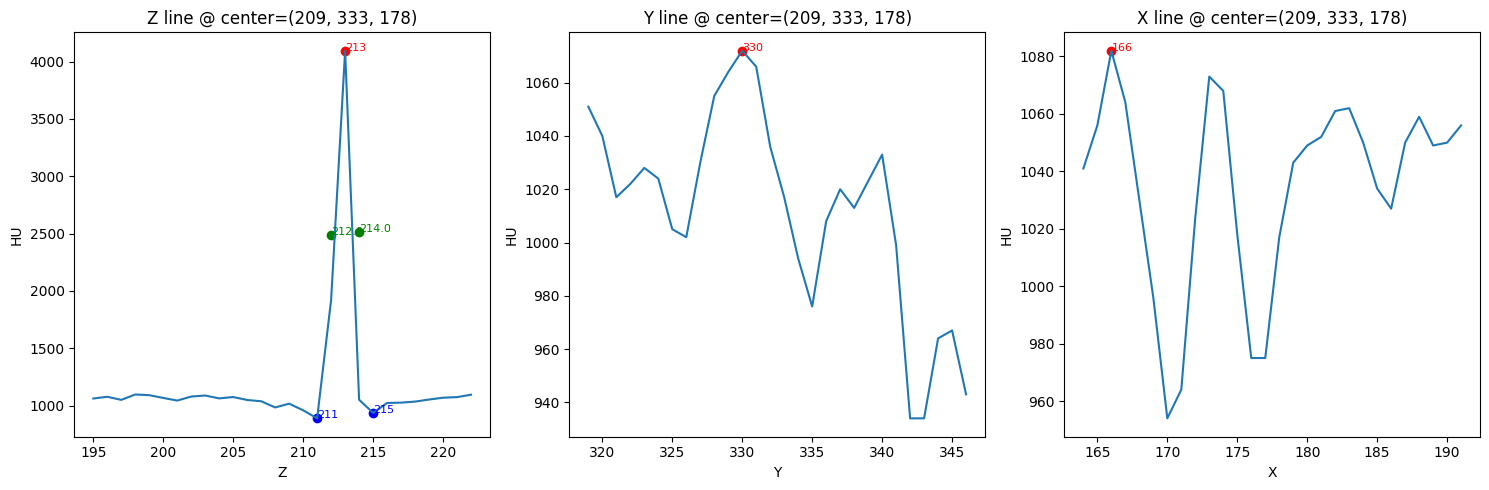

In [3]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

print(pixel_spacing[0], thickness)
r = round(7 / pixel_spacing[0])

def find_rise_points(one_line, coords, axis, threshold=200):
    for i in range(len(one_line) - 1):  # 确保 i+1 不越界
        if one_line[i + 1] - one_line[i] > threshold:
            return coords[i], one_line[i]
    return None, None

def find_fall_points(one_line, coords, threshold=100):
    fall_pos = fall_hu = None
    for i in range(1, len(one_line)):
        if one_line[i - 1] - one_line[i] > threshold:  # 检测下降
            fall_pos = coords[i]
            fall_hu = one_line[i]
            # return coords[i], one_line[i]  # 返回下降后的点和值
    return fall_pos, fall_hu


def cal_lines(one_line, axis: str, center_coord, data_shape):
    one_line = one_line.astype(np.int32)
    center_x, center_y, center_z = center_coord
    if axis == "x":
        coord_start = max(0, center_x - r)
        coord_end = min(data_shape[2], center_x + r)
    elif axis == "y":
        coord_start = max(0, center_y - r)
        coord_end = min(data_shape[1], center_y + r)
    else:
        coord_start = max(0, center_z - r)
        coord_end = min(data_shape[0], center_z + r)

    coords = np.arange(coord_start, coord_end)
    
    # 最大值
    max_val = np.max(one_line)
    max_idx1 = np.argmax(one_line)
    max_pos1 = coords[max_idx1]

    # 下降点（从最大值向后）
    right_part = one_line[max_idx1 + 1:]
    if np.any(right_part < max_val):
        max_idx2 = max_idx1 + np.argmax(right_part < max_val)
        max_pos2 = coords[max_idx2]
    else:
        max_idx2 = max_idx1
        max_pos2 = coords[max_idx2]
    
    # 上升最大点，下降最小点
    rise_pos, rise_hu = find_rise_points(one_line=one_line, coords=coords, axis=axis)
    fall_pos, fall_hu = find_fall_points(one_line=one_line, coords=coords)
    
    # 取中间点
    if rise_pos is not None and max_pos1 is not None:
        rise_mid_pos = (max_pos1 + rise_pos) / 2
        rise_mid_hu = (max_val + rise_hu) / 2
        plt.scatter(rise_mid_pos, rise_mid_hu, color='green', label='Max2')
        plt.text(rise_mid_pos, rise_mid_hu, f'{rise_mid_pos}', color='green', fontsize=8)
        
    if fall_pos is not None and max_pos2 is not None:
        fall_mid_pos = (max_pos2 + fall_pos) / 2
        fall_mid_hu = (max_val + fall_hu) / 2
        plt.scatter(fall_mid_pos, fall_mid_hu, color='green', label='Max2')
        plt.text(fall_mid_pos, fall_mid_hu, f'{fall_mid_pos}', color='green', fontsize=8)
    

    # 绘图
    plt.plot(coords, one_line, label=f'{axis.upper()} Line')
    
    # 最大值及下降点
    plt.scatter(max_pos1, max_val, color='red', label='Max1')
    plt.text(max_pos1, max_val, f'{max_pos1}', color='red', fontsize=8)
    
    if max_pos2 != max_pos1:
        plt.scatter(max_pos2, one_line[max_idx2], color='red', label='Max2')
        plt.text(max_pos2, one_line[max_idx2], f'{max_pos2}', color='red', fontsize=8)
        

    if rise_pos is not None:
        plt.scatter(rise_pos, one_line[coords == rise_pos], color='blue', label='Rise Start')
        plt.text(rise_pos, rise_hu, f'{rise_pos}', color='blue', fontsize=8)
    if fall_pos is not None:
        plt.scatter(fall_pos, one_line[coords == fall_pos], color='blue', label='Fall Start')
        plt.text(fall_pos, fall_hu, f'{fall_pos}', color='blue', fontsize=8)

    if axis == "x":
        axis = "z"
    elif axis == "z":
        axis = "x"
    plt.title(f'{axis.upper()} line @ center={center_coord}')
    plt.xlabel(axis.upper())
    plt.ylabel('HU')


for center in p_bounds.keys():
    if center == (280.0, 136.0, 266.0):
        center = (283.0, 136.0, 266.0)
    x, y, z = int(center[0]), int(center[1]), int(center[2])

    x_line = np.array([data[i, y, z] for i in range(x - r, x + r)])
    y_line = np.array([data[x, i, z] for i in range(y - r, y + r)])
    z_line = np.array([data[x, y, i] for i in range(z - r, z + r)])

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    cal_lines(one_line=x_line, axis="x", center_coord=(x, y, z), data_shape=data.shape)

    plt.subplot(1, 3, 2)
    cal_lines(one_line=y_line, axis="y", center_coord=(x, y, z), data_shape=data.shape)

    plt.subplot(1, 3, 3)
    cal_lines(one_line=z_line, axis="z", center_coord=(x, y, z), data_shape=data.shape)

    plt.tight_layout()
    plt.show()
